In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.applications import InceptionV3
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
                               height_shift_range=0.2,validation_split=0.2)

batch_size = 8

train_data = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

validation_data = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='validation')

Found 16442 images belonging to 2 classes.
Found 4109 images belonging to 2 classes.


In [3]:
test_datagen =ImageDataGenerator(rescale=1./255)
test_data=test_datagen.flow_from_directory('drowsiness data/test',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

Found 3129 images belonging to 2 classes.


In [4]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_tensor=Input(shape=(80,80,3)))

In [16]:

for   in base_model.layers[:-12]:
    layer.trainable=False
    
for layer in base_model.layers[-12:]:
    layer.trainable=True
    
for layer in base_model.layers:
    print(layer.name,layer.trainable)

input_1 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activati

In [21]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                65568     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [46]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=False)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=6,validation_data=validation_data,callbacks=earlystopping)

Epoch 1/6
2056/2056 [==============================] - 239s 110ms/step - loss: 0.1755 - accuracy: 0.9313 - val_loss: 0.7836 - val_accuracy: 0.8357
Epoch 2/6
2056/2056 [==============================] - 203s 99ms/step - loss: 0.1777 - accuracy: 0.9321 - val_loss: 0.6287 - val_accuracy: 0.8309
Epoch 3/6
2056/2056 [==============================] - 182s 89ms/step - loss: 0.1700 - accuracy: 0.9341 - val_loss: 0.7455 - val_accuracy: 0.8552
Epoch 4/6
2056/2056 [==============================] - 159s 77ms/step - loss: 0.1691 - accuracy: 0.9353 - val_loss: 0.8549 - val_accuracy: 0.8282
Epoch 5/6
2056/2056 [==============================] - 151s 73ms/step - loss: 0.1704 - accuracy: 0.9329 - val_loss: 0.7086 - val_accuracy: 0.8557
Epoch 6/6
2056/2056 [==============================] - 151s 73ms/step - loss: 0.1675 - accuracy: 0.9346 - val_loss: 0.8432 - val_accuracy: 0.8333


In [ ]:
# working on 20 epochs well -- val_accuracy-0.8438 and train_accuracy--0.9183


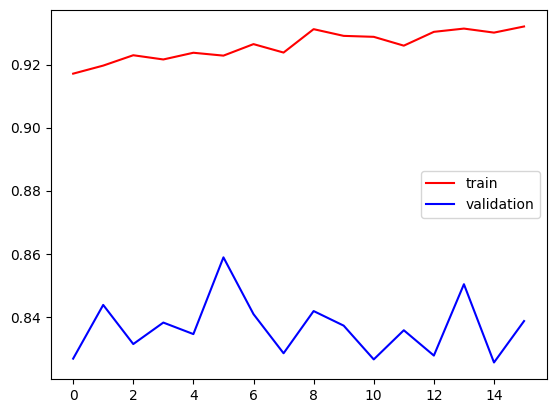

In [28]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

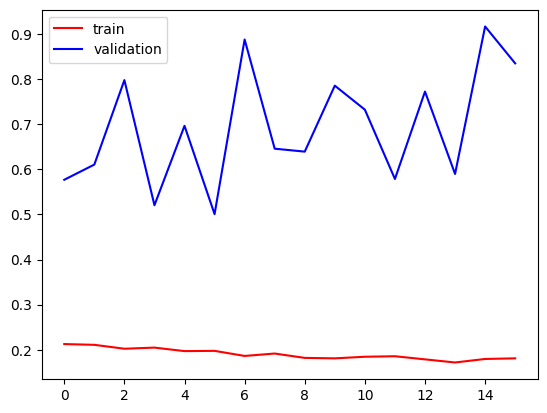

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [47]:
pred=model.predict(test_data)
opn=[]
closen= []
for p in pred:
    if p[0]>=0.5:
        opn.append(1)
    else:
        closen.append(0)
        
print(len(opn))
print(len(closen))

392/392 [==============================] - 55s 109ms/step
1211
1918


In [44]:
# model.save("")

In [45]:
print(model_input)

(None, 80, 80, 3)
